In [22]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
from keras.datasets import cifar10
import numpy as np
import ssl
from tensorflow import keras 
ssl._create_default_https_context = ssl._create_unverified_context

In [23]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


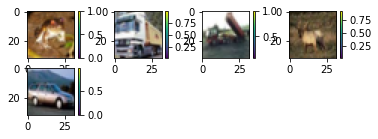

In [32]:

plt.figure()
for i in range(5):
    plt.subplot(4,4, i+1)
    plt.imshow(x_train[i])
    plt.colorbar()
plt.show()

In [25]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Output
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(10, activation='softmax'))

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [27]:
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [28]:
x_train = x_train.astype('float32')/ 255.0
x_test = x_test.astype('float32')/255.0

In [29]:
model.fit(x_train,y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 255s 161ms/step - loss: 1.3598 - accuracy: 0.5094
Epoch 2/5
1563/1563 [==============================] - 177s 113ms/step - loss: 0.8755 - accuracy: 0.6944
Epoch 3/5
1563/1563 [==============================] - 206s 132ms/step - loss: 0.6912 - accuracy: 0.7582
Epoch 4/5
1563/1563 [==============================] - 201s 129ms/step - loss: 0.5692 - accuracy: 0.8011
Epoch 5/5
1563/1563 [==============================] - 203s 130ms/step - loss: 0.4710 - accuracy: 0.8357


In [30]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 12s 34ms/step - loss: 0.7435 - accuracy: 0.7511


[0.7435353398323059, 0.7511000037193298]